In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
from matplotlib.pyplot import cm

In [2]:
csv = r"C:\Users\jleus\OneDrive\Documents\CSVS\league2011cleaned.csv"
df = pd.read_csv(csv)
df

,Name,G,Date,Age,Tm,Location,Opp,GS,Active,MP,...,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,BPM,GmID
0,"Afflalo, Arron",1.0,20101027.0,-0.405788,DEN,1,UTA,1.694322,1,0.962963,...,-0.861657,0.290160,0.527338,-0.494408,-0.874361,-0.460365,1.783964,-1.225778,1.315045,20101128
1,"Afflalo, Arron",2.0,20101029.0,-0.405314,DEN,0,NOH,-0.451827,1,1.045002,...,-1.243676,0.351907,-0.630328,0.183730,-0.874361,-1.263625,1.739671,0.956457,0.523568,20101130
2,"Afflalo, Arron",3.0,20101030.0,-0.405076,DEN,0,HOU,1.004489,1,0.880041,...,-0.294790,0.036315,-0.051495,-0.494408,-0.874361,-0.980787,0.920248,-0.774281,0.339345,20101131
3,"Afflalo, Arron",4.0,20101103.0,-0.404128,DEN,1,DAL,-0.068586,1,1.544297,...,-0.393375,-0.409631,-0.092841,0.029608,0.100084,-0.528247,0.610196,0.504960,0.325698,20101204
4,"Afflalo, Arron",5.0,20101105.0,-0.403653,DEN,1,LAC,0.544599,1,1.140274,...,-0.208527,0.290160,0.527338,-0.494408,0.606289,0.320267,0.078678,0.128713,0.080068,20101206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31017,"Temple, Garrett",11.0,20110208.0,-0.580352,MIL,1,TOR,1.387730,1,-1.536158,...,-1.243676,-0.896740,-0.630328,-0.494408,-0.874361,-0.482992,0.100825,-1.075279,-0.117802,20110338
31018,"Temple, Garrett",NaN,20110209.0,-0.580115,MIL,0,WAS,-1.141661,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20110339
31019,"Temple, Garrett",NaN,20110211.0,-0.579641,MIL,0,MEM,-0.221882,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20110341
31020,"Temple, Garrett",NaN,20110212.0,-0.579404,MIL,1,IND,-0.451827,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20110342


In [3]:
def plot_data(df, stat, color):
    xs = df[stat]
    bins = np.linspace(-3.0, 3.0, num=30)
    plt.hist(xs, bins=bins, color=color)
    plt.title(stat)
    plt.show()

In [4]:
def data_by_std(df, std_stat):
    stds = [-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5]
    dfs = []
    for std in stds:
        dfs.append(df[df['MP'] > std])
    return dfs



In [5]:
def gather_target_stat_data(target_stat, df):
    stat_dfs = []
    x = 0
    for df in dfs:
        stat_dfs.append(df[target_stat])
        stat_dfs[x].dropna()
        x+=1
    return stat_dfs


In [6]:
def standerdize_data_length(stat_dfs):
    standerdizers = []
    x = 0
    for df in stat_dfs:
        standerdizers.append(len(stat_dfs[0]) / len(df))
        stat_dfs[x] = df.sample(frac=standerdizers[x], replace=True)
        x+=1
    return stat_dfs

In [7]:
def plot_stat_data_by_std(stat_dfs, title):
    fig, axs = plt.subplots(4, 3)
    x=0
    y=0
    plt.title(title)
    bins = np.linspace(-3.0, 3.0, num=30)
    color = iter(cm.rainbow(np.linspace(0, 1, 16)))
    for df in stat_dfs:
        axs[x, y].hist(x=df, bins=bins, color=next(color))
        x+=1
        if x == 4:
            x=0
            y+=1

In [8]:
csv = r"C:\Users\jleus\OneDrive\Documents\CSVS\league2011cleaned.csv"
df = pd.read_csv(csv)

In [9]:
stats = []
for stat in df:
    stats.append(stat)
print(stats)

['Name', 'G', 'Date', 'Age', 'Tm', 'Location', 'Opp', 'GS', 'Active', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'PlayerID', 'TmID', 'TS%', 'eFG%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'BPM', 'GmID']


In [10]:
stats = ['Age', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'TS%', 'eFG%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'BPM']

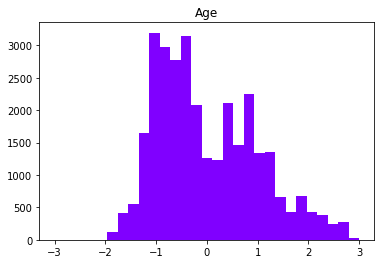

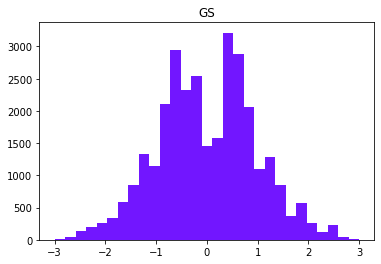

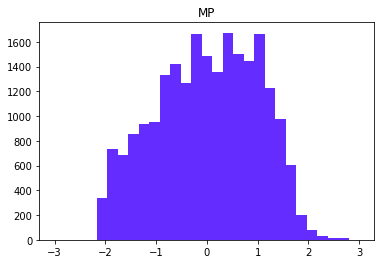

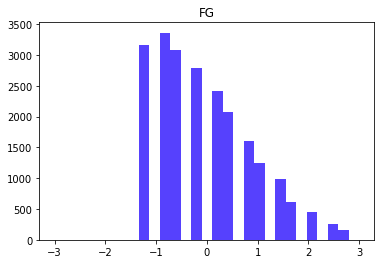

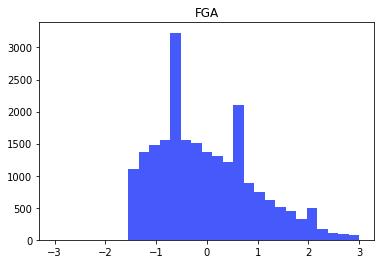

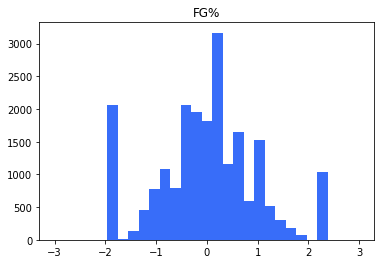

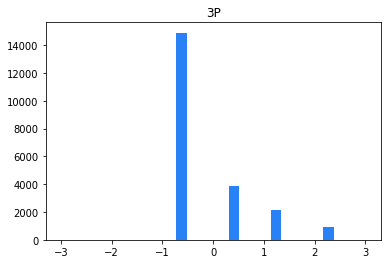

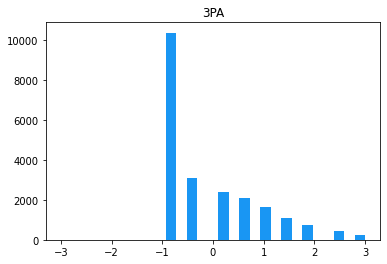

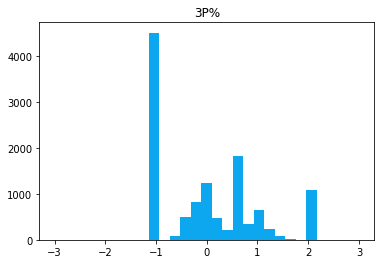

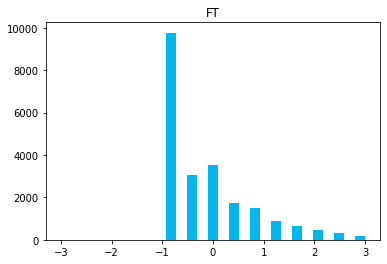

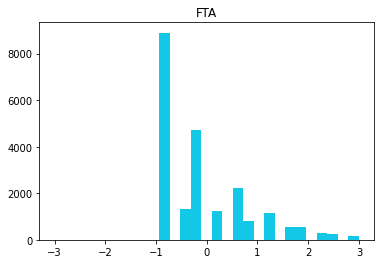

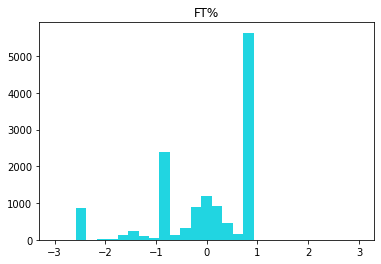

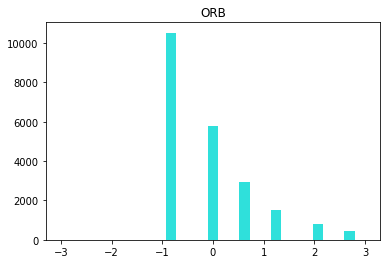

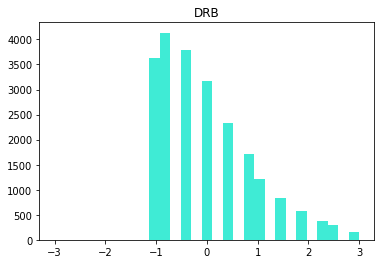

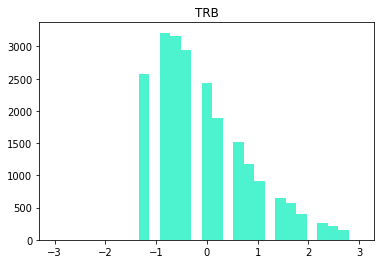

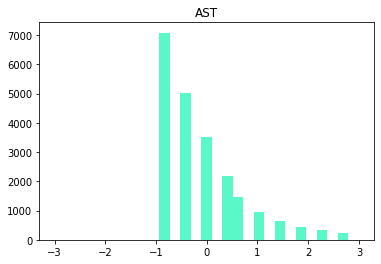

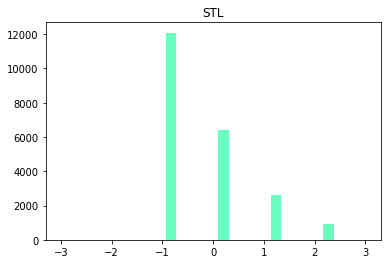

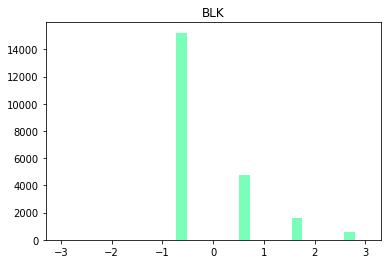

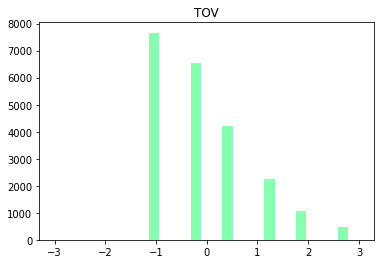

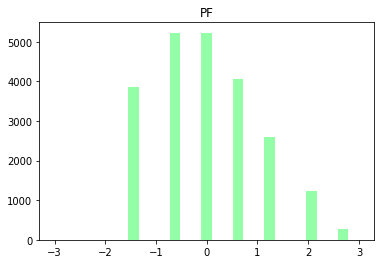

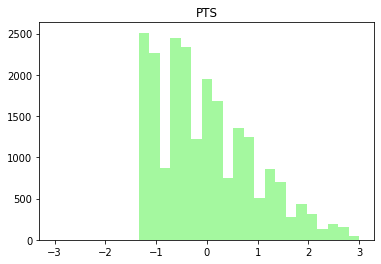

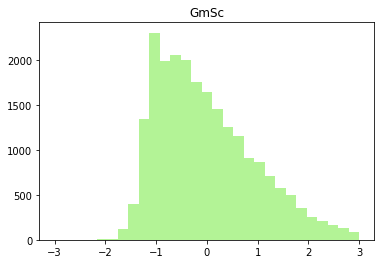

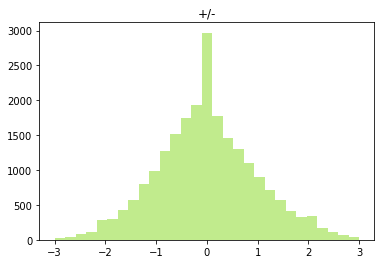

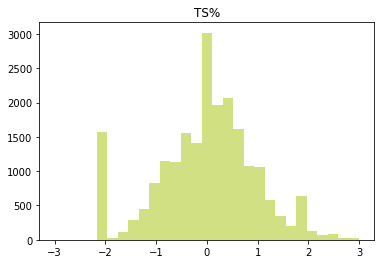

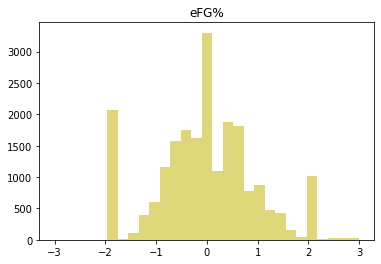

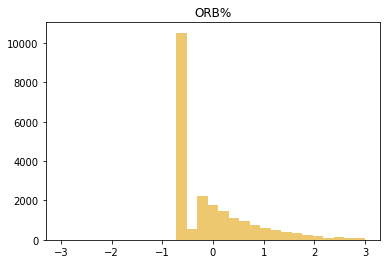

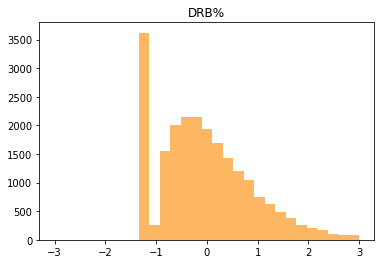

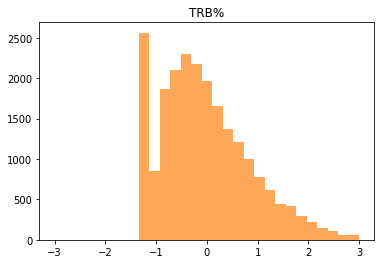

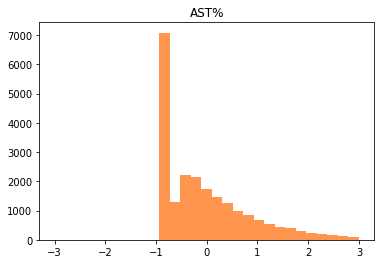

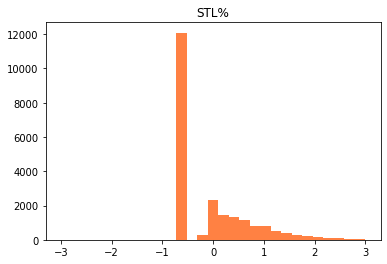

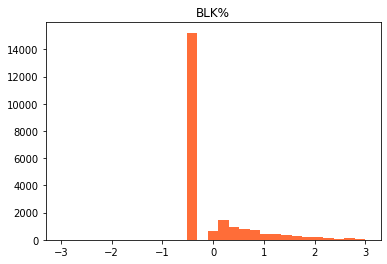

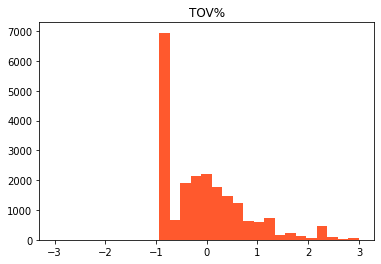

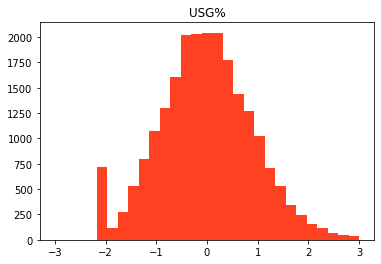

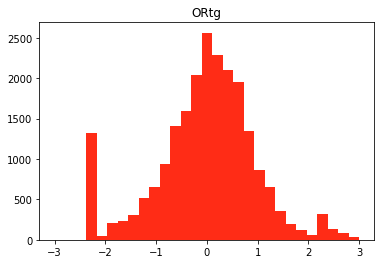

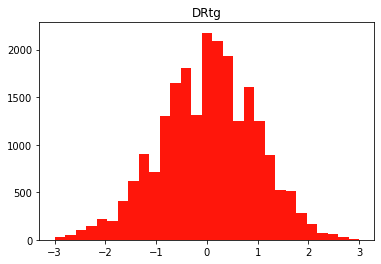

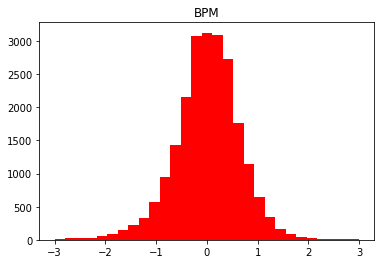

In [11]:
color = iter(cm.rainbow(np.linspace(0, 1, len(stats))))
for stat in stats:
    plot_data(df, stat, next(color))

C:\Users\jleus\AppData\Local\Temp/ipykernel_6756/2201866866.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(4, 3)


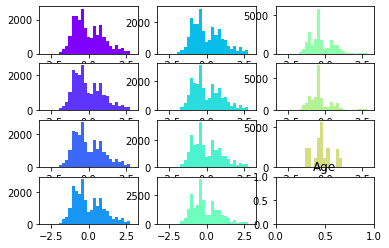

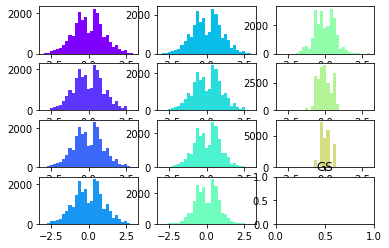

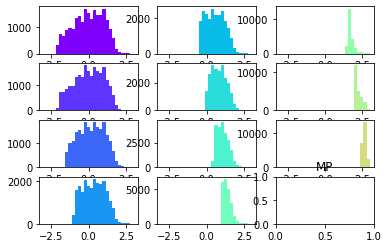

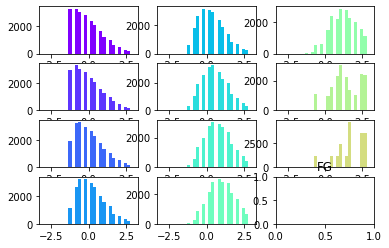

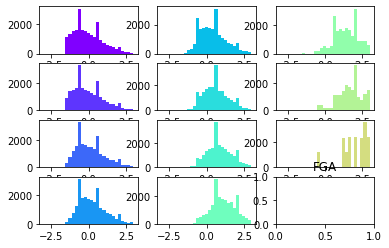

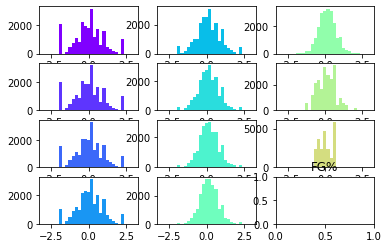

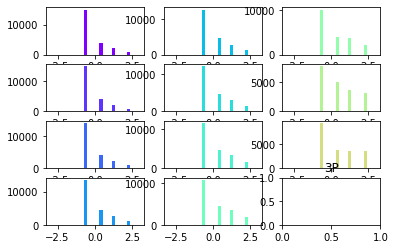

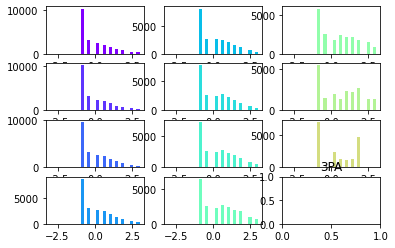

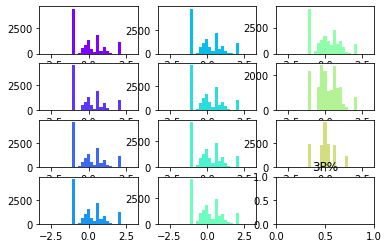

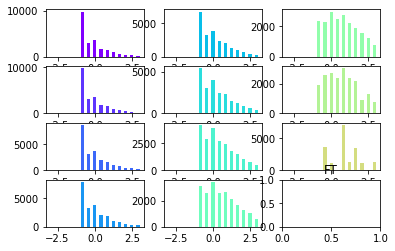

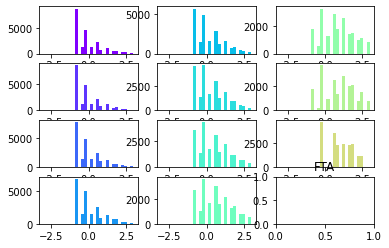

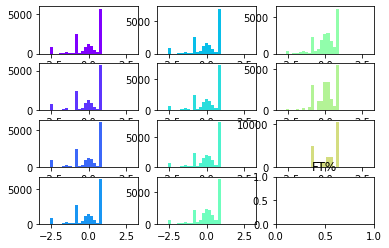

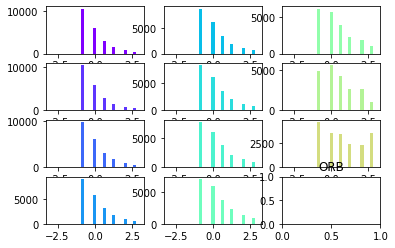

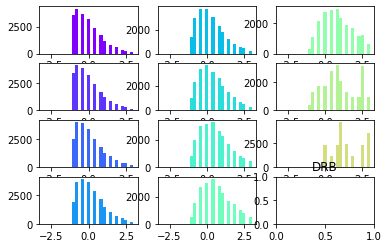

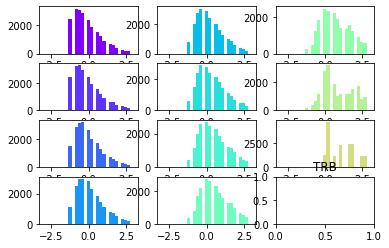

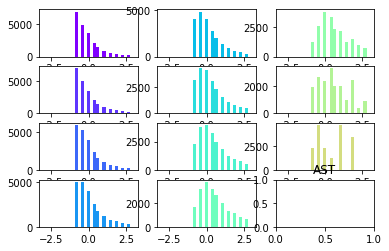

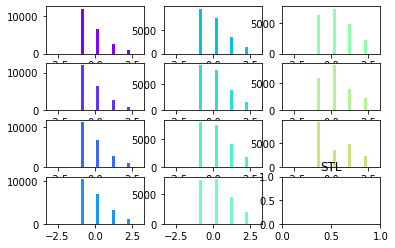

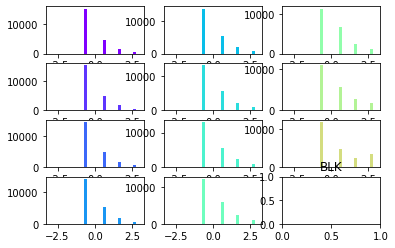

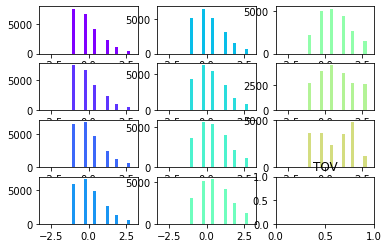

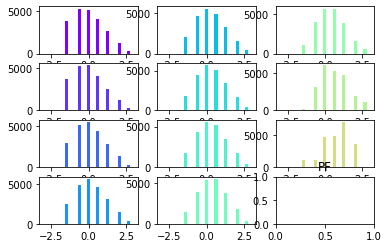

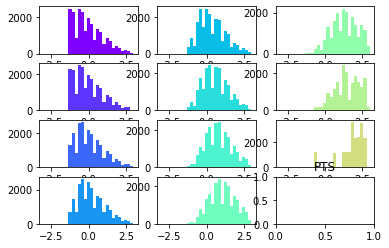

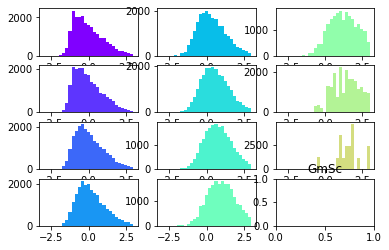

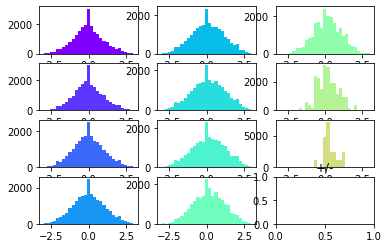

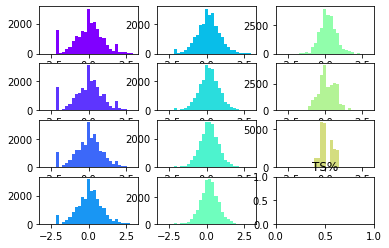

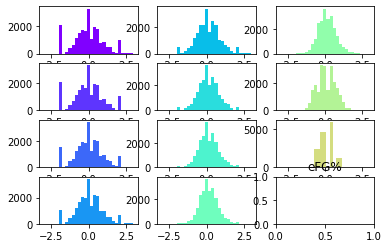

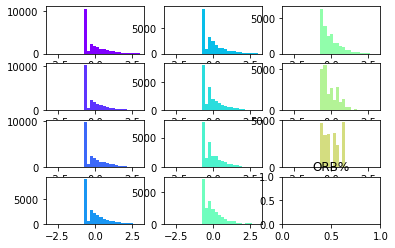

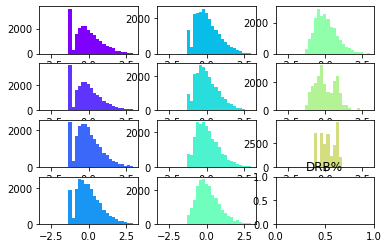

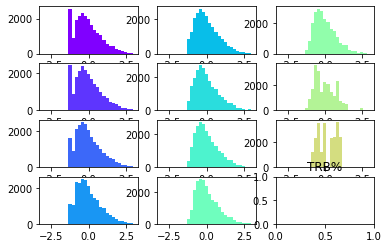

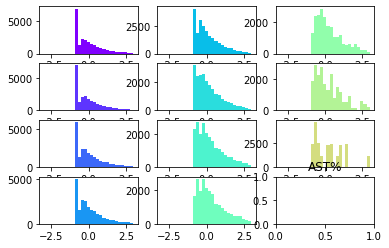

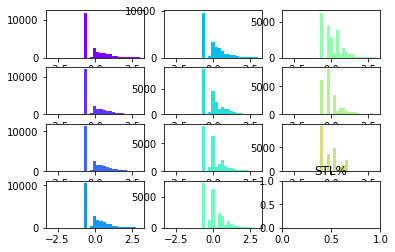

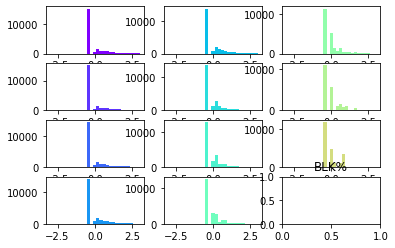

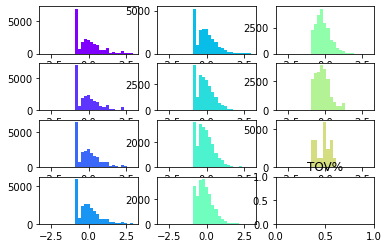

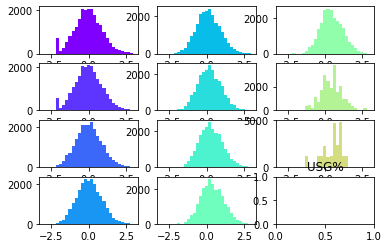

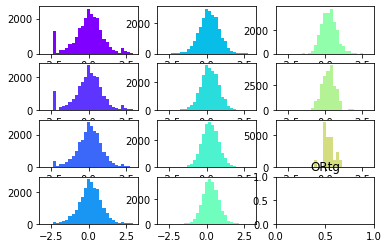

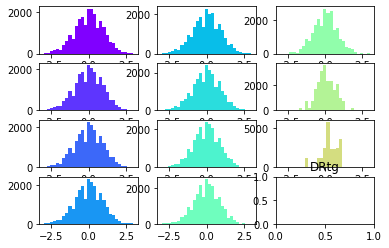

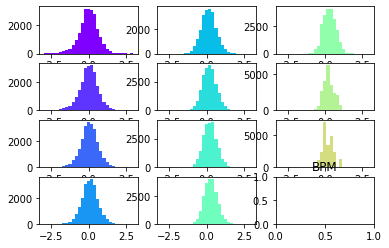

In [12]:
dfs = data_by_std(df, 'MP')
big_stat_array = []
x=0
for stat in stats:
    big_stat_array.append(gather_target_stat_data(stat, df))
    big_stat_array[x] = standerdize_data_length(big_stat_array[x])
    plot_stat_data_by_std(big_stat_array[x], stat)
    filenum = str(x)
    x+=1